In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import TwoSlopeNorm
from matplotlib.patches import Rectangle
from matplotlib import rc
from camminapy import createheatmap

import kitcolors as kit
from camminapy import *

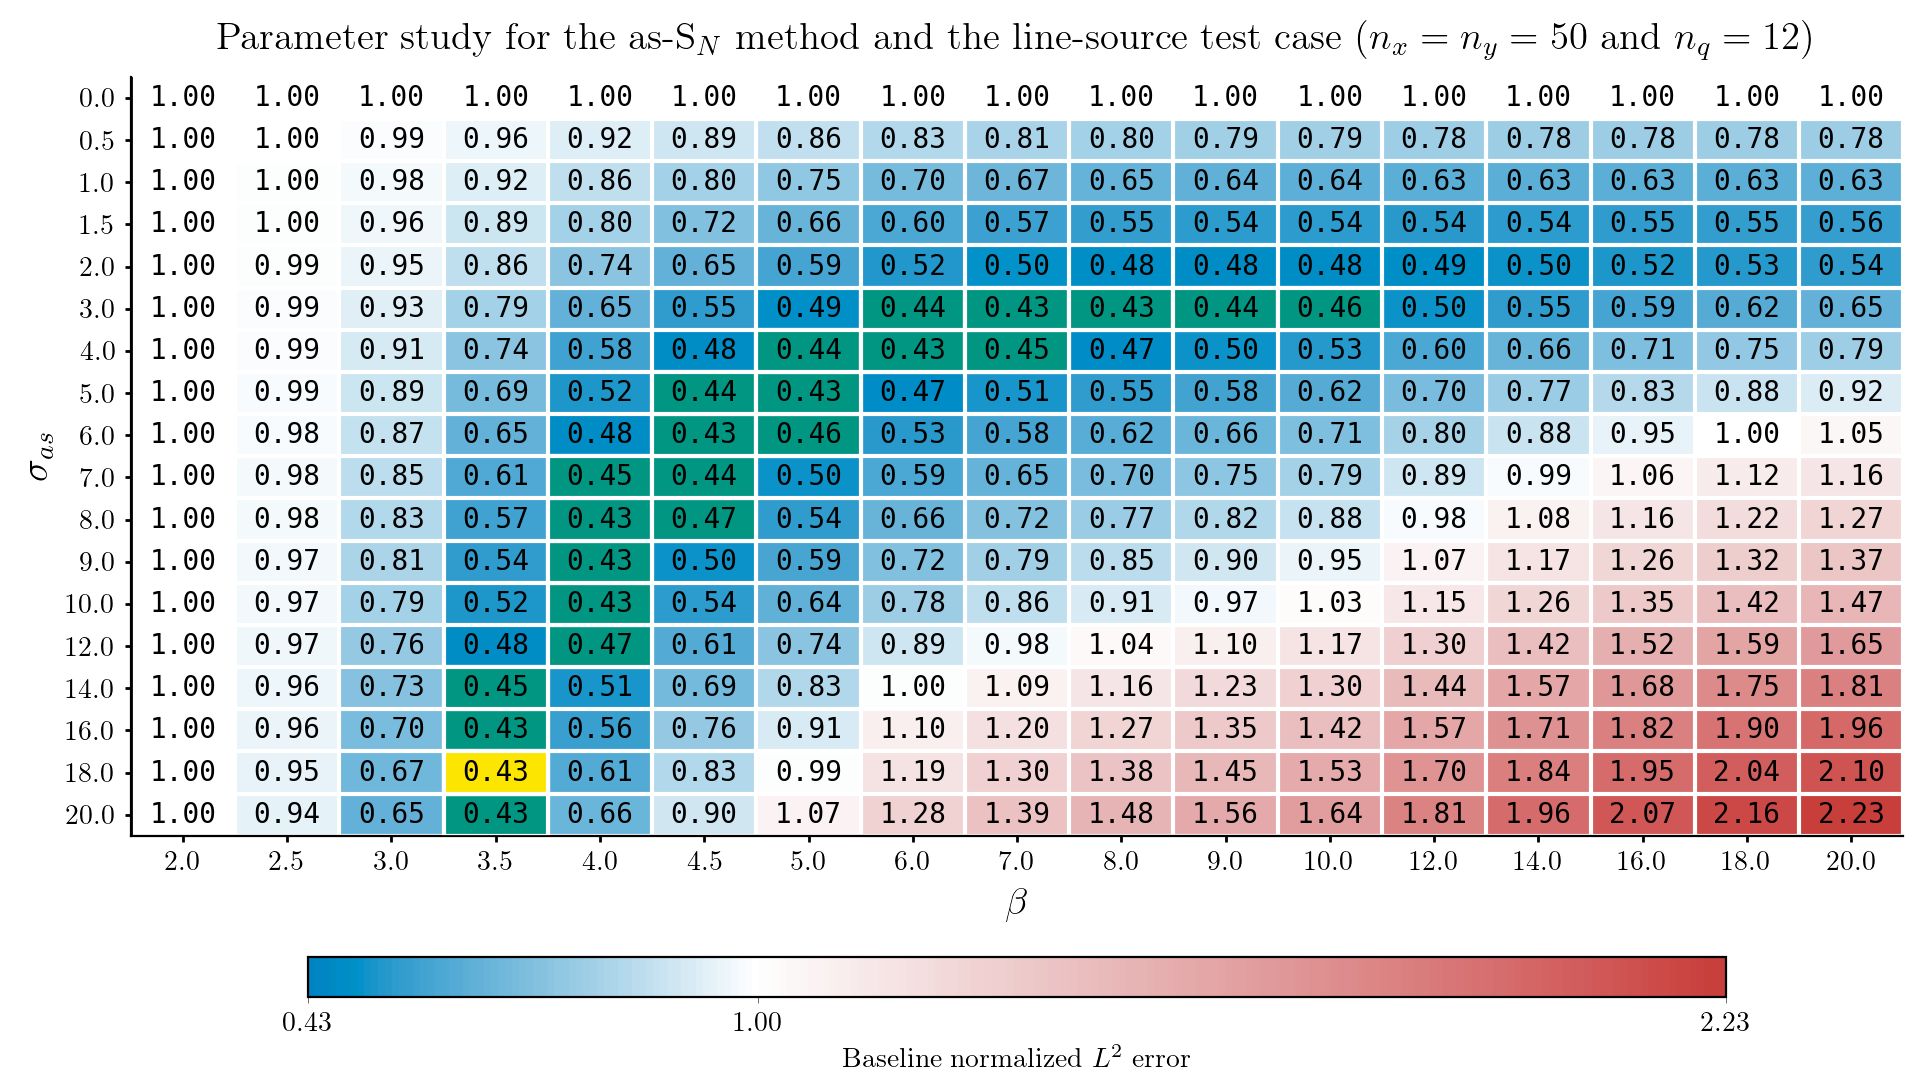

In [2]:
df = pd.read_csv("summary.csv")
df["L2"] = df["absL2"]
df = df[df["convolutionwidth"]>= 2.0]
createheatmap(df,50,12,safetyfactor=1.1,filename="dummy.pdf")

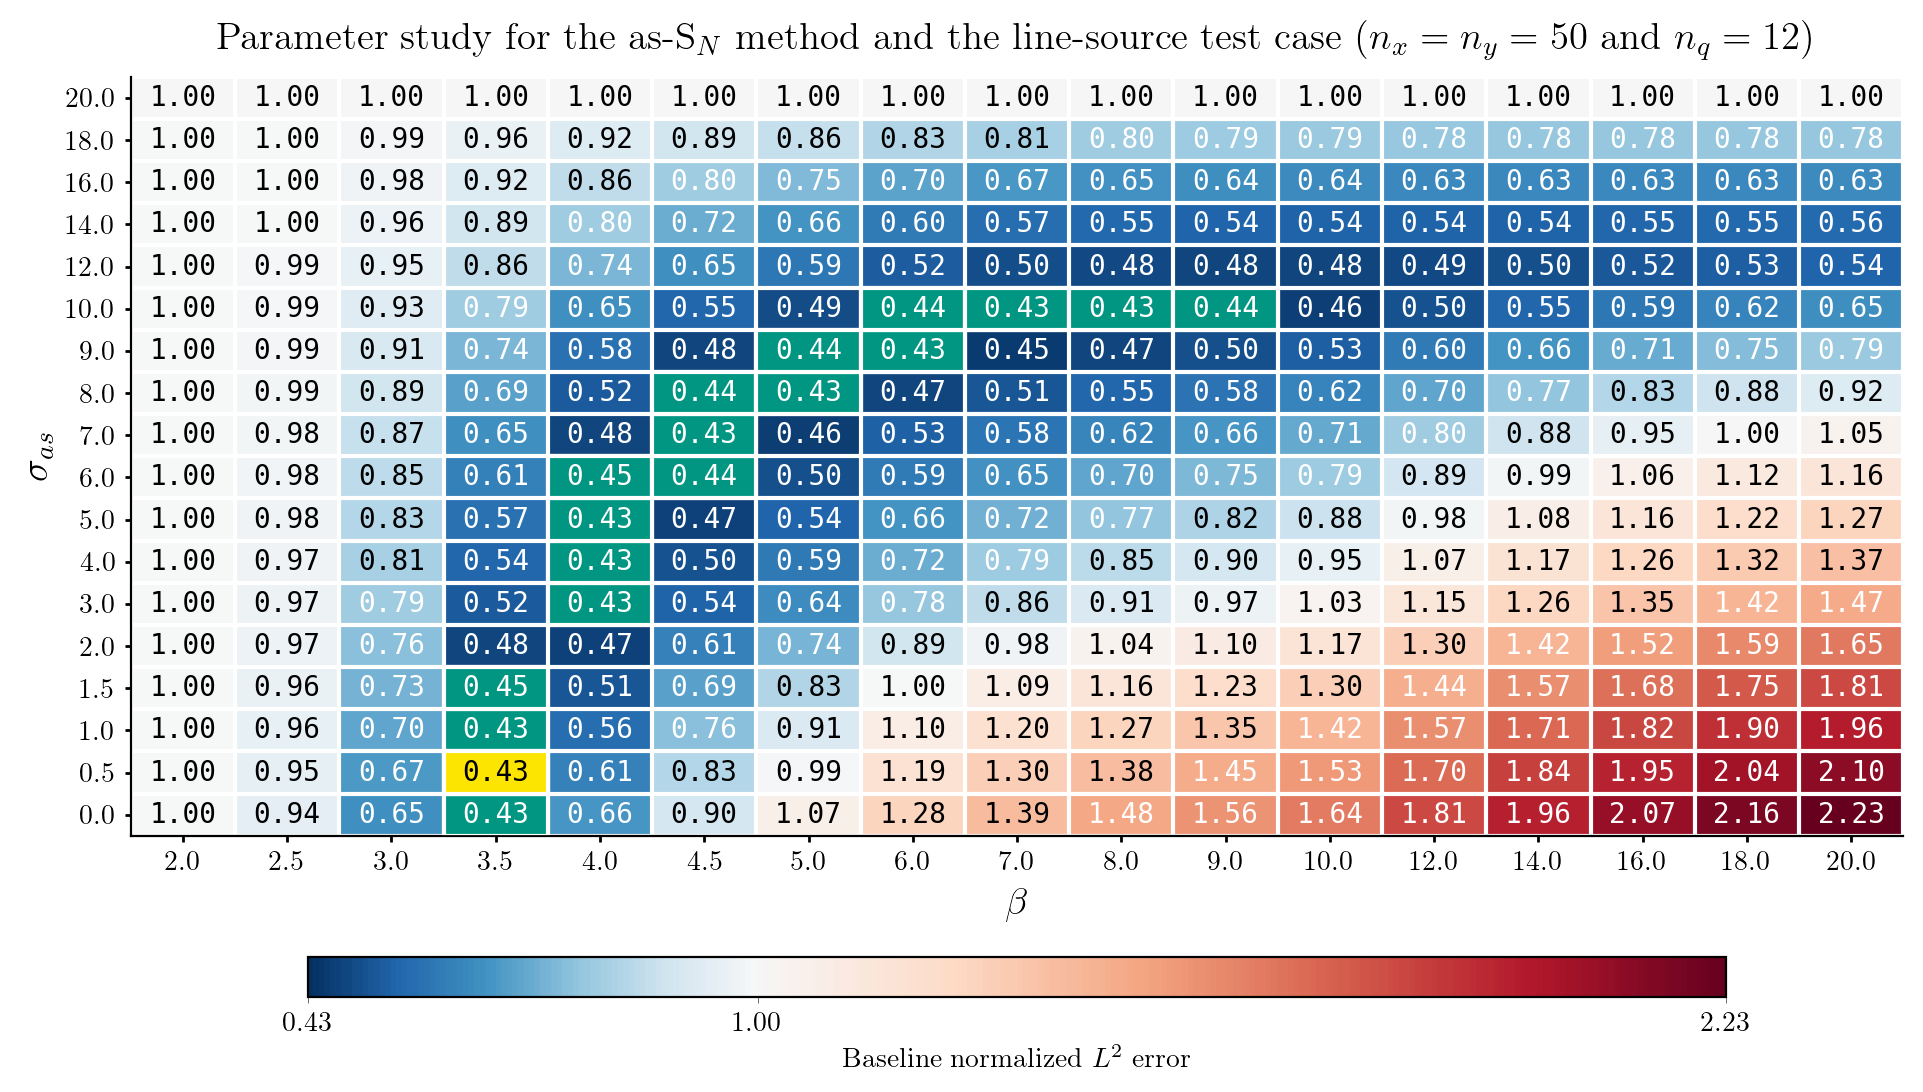

In [5]:
plt.style.use("kitish")
s = 1.9
fig, ax = plt.subplots(figsize=(s*5, 1.5*s*1.875))
divnorm = TwoSlopeNorm(vmin=np.min(z), vcenter=1, vmax=np.max(z))
cmap = mycmapdiv(kit.blue, "white", kit.purple, nbins=201)
im = ax.pcolormesh(z, cmap="RdBu_r", norm=divnorm)

# write text
for xi, posx in enumerate(0.5+np.arange(z.shape[1])):
    if xi < 3:
        continue
    for yi, posy in enumerate(0.5+np.arange(z.shape[0])):
        ax.text(posx, posy, "{:02.2f}".format(z[yi, xi]),
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=10,
                fontfamily = "monospace",
                usetex = False,
                color="k" if 1.4 > z[yi, xi] > 0.8 else "w" if z[yi,
                                                                 xi] > 1.0001*np.min(z) else "k",
                zorder=1000000 if z[yi, xi] < 1.05*np.min(z) else 10)  # 0.7<z[yi,xi]<1.2 else "gray")

        if z[yi, xi] < 1.000001*np.min(z):
            ax.add_patch(Rectangle((posx-0.5, posy-0.5), 1, 1, fill=True,
                                   edgecolor="white", facecolor=kit.yellow, lw=1.5, zorder=100))
        if z[yi, xi] < 1.05*np.min(z):
            ax.add_patch(Rectangle((posx-0.5, posy-0.5), 1, 1, fill=True,
                                   edgecolor="white", facecolor=kit.green, lw=1.5, zorder=99))


ax.set_xticks(0.5+np.arange(z.shape[1]))
ax.set_yticks(0.5+np.arange(z.shape[0]))
ax.set_xticklabels(x)  # ,fontsize = 6,rotation = 45)
ax.set_yticklabels(y)  # ,fontsize = 6);
ax.set_xlabel(r"$\beta$", fontsize=14)
ax.set_ylabel("$\sigma_{as}$", fontsize=14)

# Now adding the colorbar
cbar = fig.colorbar(im, orientation="horizontal", format='%.2f',
                    pad=0.02, shrink=0.8, ticks=[np.min(z), 1, np.max(z)], aspect=20)
cbar.ax.set_xlabel("Baseline normalized $L^2$ error")

# Hide the right and top spines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Horizontal and vertical lines
for xi in np.arange(z.shape[1]+1):
    ax.axvline(xi, color="w", linewidth=1.5)
for yi in np.arange(z.shape[0]+1):
    ax.axhline(yi, color="w", linewidth=1.5)
ax.set_xlim([3, 20])

ax.yaxis.set_tick_params(width=1)
ax.xaxis.set_tick_params(width=1)
ax.axhline(0,color = kit.black,lw = 1, zorder=1000000000)
ax.axvline(0,color = kit.black,lw = 1, zorder=1000000000)

ax.set_title("Parameter study for the as-S$_N$ method and the line-source test case ($n_x=n_y=50$ and $n_q=12$)", fontsize=14)

plt.savefig("heatmap_ls.png")#, rasterized=True)